In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sf_qual = pd.read_csv("samples/sampled_selfies_quality.csv")
sf_trunc_qual = pd.read_csv("samples/truncated_selfies_quality.csv")
sf_un_qual = pd.read_csv("samples/unstable_selfies_quality.csv")
sm_qual = pd.read_csv("samples/sampled_smiles_quality.csv")
ms_qual = pd.read_csv("samples/moses_quality.csv")
no_hex_qual = pd.read_csv("samples/no_hex_selfies_quality.csv")
no_overload_qual = pd.read_csv("samples/no_overload_selfies_quality.csv")

ms_qual_subset = ms_qual.sample(100000)
sf_qual_subset = sf_qual.sample(100000) 
sf_un_qual_subset = sf_un_qual.sample(100000)
sm_qual_subset = sm_qual.sample(100000)
no_hex_qual_subset = no_hex_qual.sample(100000)
no_overload_qual_subset = no_overload_qual.sample(100000)

#picking colors
palette = sns.color_palette()
palette[3] = "lightgrey"

In [10]:
#get invalid rate

print("Canon smile from sampled selfie invalid rate: " +  str(len(sf_qual["QED"])/300000))
print("Canon smile from sampled no hex selfie invalid rate: " +  str(len(no_hex_qual["QED"])/300000))
print("Canon smile from sampled no overload selfie invalid rate: " +  str(len(no_overload_qual["QED"])/300000))
print("Sample smiles invalid rate: " + str(len(sm_qual["QED"])/300000))

Canon smile from sampled selfie invalid rate: 0.9999533333333334
Canon smile from sampled no hex selfie invalid rate: 0.99995
Canon smile from sampled no overload selfie invalid rate: 0.99995
Sample smiles invalid rate: 0.83005


In [ ]:
#2D plot does not look good

fig, ax = plt.subplots()
palette = sns.color_palette("hls")
k = sns.kdeplot(x=sf_qual["QED"][0:5000], y=sf_qual["SA"][0:5000], ax=ax, color=palette[0], fill=False, label="selfies")
k = sns.kdeplot(x=sm_qual["QED"][0:5000], y=sm_qual["SA"][0:5000], ax=ax, color=palette[1], fill=False, label="smiles")
k = sns.kdeplot(x=ms_qual["QED"][0:5000], y=ms_qual["SA"][0:5000], ax=ax, color=palette[2], fill=False, label="moses")
fig.legend()

k.set_xlim(0,1.2)
k.set_ylim(0,10)

plt.tight_layout()
plt.show()

In [14]:
#SA and QED for selfies/unstable/smiles/moses

f, ax = plt.subplots(1, 2, figsize=(15, 6))

#QED
sm_qed_mean = np.mean(sm_qual["QED"])
sf_qed_mean = np.mean(sf_qual["QED"])
sf_trunc_qed_mean = np.mean(sf_trunc_qual["QED"])
sf_un_qed_mean = np.mean(sf_un_qual["QED"])
ms_qed_mean = np.mean(ms_qual["QED"])
no_hex_qed_mean = np.mean(no_hex_qual["QED"])
no_overload_qed_mean = np.mean(no_overload_qual["QED"])

sns.kdeplot(data=sf_qual["QED"], ax=ax[0], color=palette[0], fill=True, label='selfies')
sns.kdeplot(data=sf_un_qual["QED"], ax=ax[0], color=palette[1], fill=True, label='unstable')
sns.kdeplot(data=sm_qual["QED"], ax=ax[0], color=palette[2], fill=True, label='smiles')
sns.kdeplot(data=ms_qual["QED"], ax=ax[0], color=palette[3], fill=True, label='moses')
sns.kdeplot(data=no_hex_qual["QED"], ax=ax[0], color=palette[4], fill=True, label='no_hex')
sns.kdeplot(data=no_overload_qual["QED"], ax=ax[0], color=palette[5], fill=True, label='no_overload')


ax[0].set_ylabel("Density")
ax[0].set_xlabel("QED")

ax[0].axvline(sf_qed_mean, ls=':', color=palette[0])
ax[0].axvline(sf_un_qed_mean, ls=':', color=palette[1])
ax[0].axvline(sm_qed_mean, ls=':', color=palette[2])
ax[0].axvline(ms_qed_mean, ls=':', color=palette[3])
ax[0].axvline(no_hex_qed_mean, ls=':', color=palette[4])
ax[0].axvline(no_overload_qed_mean, ls=':', color=palette[5])

#SA
sm_sa_mean = np.mean(sm_qual["SA"])
sf_sa_mean = np.mean(sf_qual["SA"])
sf_trunc_sa_mean = np.mean(sf_trunc_qual["SA"])
sf_un_sa_mean = np.mean(sf_trunc_qual["SA"])
ms_sa_mean = np.mean(ms_qual["SA"])

sns.kdeplot(data=sf_qual["SA"], ax=ax[1], color=palette[0], fill=True)
sns.kdeplot(data=sf_un_qual["SA"], ax=ax[1], color=palette[1], fill=True)
sns.kdeplot(data=sm_qual["SA"], ax=ax[1], color=palette[2], fill=True)
sns.kdeplot(data=ms_qual["SA"], ax=ax[1], color=palette[3], fill=True)

ax[1].set_ylabel(" ")
ax[1].set_xlabel("SA")

plt.axvline(sf_sa_mean, ls=':', color=palette[0])
plt.axvline(sf_trunc_sa_mean, ls=':', color=palette[1])
plt.axvline(sm_sa_mean, ls=':', color=palette[2])
plt.axvline(ms_sa_mean, ls=':', color=palette[3])


f.legend(loc="upper right")
plt.tight_layout()

f.savefig("Paper Figures/SA_QED_sm_sf_un_ms.pdf")

In [ ]:
#SA and QED for selfies/unstable/smiles/moses

f, ax = plt.subplots(1, 2, figsize=(15, 6))

#QED
sf_qed_mean = np.mean(sf_qual["QED"])
no_hex_qed_mean = np.mean(no_hex_qual["QED"])
no_overload_qed_mean = np.mean(no_overload_qual["QED"])

sns.kdeplot(data=sf_qual["QED"], ax=ax[0], color=palette[0], fill=True, label='selfies')
sns.kdeplot(data=no_hex_qual["QED"], ax=ax[0], color=palette[4], fill=True, label='no_hex')
sns.kdeplot(data=no_overload_qual["QED"], ax=ax[0], color=palette[5], fill=True, label='no_overload')


ax[0].set_ylabel("Density")
ax[0].set_xlabel("QED")

ax[0].axvline(sf_qed_mean, ls=':', color=palette[0])
ax[0].axvline(no_hex_qed_mean, ls=':', color=palette[4])
ax[0].axvline(no_overload_qed_mean, ls=':', color=palette[5])

#SA
sf_sa_mean = np.mean(sf_qual["SA"])
no_hex_sa_mean = np.mean(no_hex_qual["SA"])
no_overload_sa_mean = np.mean(no_overload_qual["SA"])

sns.kdeplot(data=sf_qual["SA"], ax=ax[1], color=palette[0], fill=True)
sns.kdeplot(data=no_hex_qual["SA"], ax=ax[1], color=palette[4], fill=True)
sns.kdeplot(data=no_overload_qual["SA"], ax=ax[1], color=palette[5], fill=True)

ax[1].set_ylabel(" ")
ax[1].set_xlabel("SA")

ax[1].axvline(sf_sa_mean, ls=':', color=palette[0])
ax[1].axvline(no_hex_sa_mean, ls=':', color=palette[4])
ax[1].axvline(no_overload_sa_mean, ls=':', color=palette[5])



f.legend(loc="upper right")
plt.tight_layout()

f.savefig("Paper Figures/SA_QED_sf_hex_over.pdf")

In [17]:
print("Fraction of smiles above 0.5 QED: " + str(len(sm_qual[sm_qual["QED"] > 0.5])/300000))
print("Fraction of selfies above 0.5 QED: " + str(len(sf_qual[sf_qual["QED"] > 0.5])/300000))
print("Fraction of truncated selfies above 0.5 QED: " + str(len(sf_trunc_qual[sf_trunc_qual["QED"] > 0.5])/len(sf_trunc_qual["QED"])))
print("Fraction of moses mols above 0.5 QED: " + str(len(ms_qual[ms_qual["QED"] > 0.5])/len(ms_qual["QED"])))
print("Fraction of no_hex selfies above 0.5 QED: " + str(len(no_hex_qual[no_hex_qual["QED"] > 0.5])/300000))
print("Fraction of no_overload selfies above 0.5 QED: " + str(len(no_overload_qual[no_overload_qual["QED"] > 0.5])/300000))

print("Fraction of smiles under 4.4 SA: " + str(len(sm_qual[sm_qual["SA"] < 4.4])/300000))
print("Fraction of selfies under 4.4 SA: " + str(len(sf_qual[sf_qual["SA"] < 4.4])/300000))
print("Fraction of truncated selfies under 4.4 SA: " + str(len(sf_trunc_qual[sf_trunc_qual["SA"] < 4.4])/len(sf_trunc_qual["SA"])))
print("Fraction of moses mols under 4.4 SA: " + str(len(ms_qual[ms_qual["SA"] < 4.4])/len(ms_qual["SA"])))
print("Fraction of no_hex selfies above under 4.4 SA: " + str(len(no_hex_qual[no_hex_qual["SA"] < 4.4])/300000))
print("Fraction of no_overload selfies above under 4.4 SA: " + str(len(no_overload_qual[no_overload_qual["SA"] < 4.4])/300000))

Fraction of smiles above 0.5 QED: 0.81008
Fraction of selfies above 0.5 QED: 0.8186533333333333
Fraction of truncated selfies above 0.5 QED: 0.7145342935859635
Fraction of moses mols above 0.5 QED: 0.9926123093679855
Fraction of no_hex selfies above 0.5 QED: 0.8060066666666666
Fraction of no_overload selfies above 0.5 QED: 0.8023233333333334
Fraction of smiles under 4.4 SA: 0.8024266666666666
Fraction of selfies under 4.4 SA: 0.76606
Fraction of truncated selfies under 4.4 SA: 0.7129754942239838
Fraction of moses mols under 4.4 SA: 0.9983239338584923
Fraction of no_hex selfies above under 4.4 SA: 0.8021433333333333
Fraction of no_overload selfies above under 4.4 SA: 0.81726


In [ ]:
#Supplemental Plots (Length , Weight, LogP show little difference)

f, ax = plt.subplots(1, 3, figsize=(20, 6))

#Length
sm_len_mean = np.mean(sm_qual["len"])
sf_len_mean = np.mean(sf_qual["len"])
sf_un_len_mean = np.mean(sf_un_qual["len"])
ms_len_mean = np.mean(ms_qual["len"])

sns.kdeplot(data=sf_qual["len"], ax=ax[0], color=palette[0], fill=True, label='selfies',  bw_adjust=3)
sns.kdeplot(data=sf_un_qual["len"], ax=ax[0], color=palette[1], fill=True, label='unstable',  bw_adjust=3)
sns.kdeplot(data=sm_qual["len"], ax=ax[0], color=palette[2], fill=True, label='smiles', bw_adjust=3)
sns.kdeplot(data=ms_qual["len"], ax=ax[0], color=palette[3], fill=True, label='moses', bw_adjust=3)

ax[0].set_ylabel("Density")
ax[0].set_xlabel("Length (smile tokens)")

ax[0].axvline(sf_len_mean, ls=':', color=palette[0])
ax[0].axvline(sf_un_len_mean, ls=':', color=palette[1])
ax[0].axvline(sm_len_mean, ls=':', color=palette[2])
ax[0].axvline(ms_len_mean, ls=':', color=palette[3])

#Molecular Weight
sm_weight_mean = np.mean(sm_qual["weight"])
sf_weight_mean = np.mean(sf_qual["weight"])
sf_un_weight_mean = np.mean(sf_un_qual["weight"])
ms_weight_mean = np.mean(ms_qual["weight"])

sns.kdeplot(data=sf_qual["weight"], ax=ax[1], color=palette[0], fill=True, bw_adjust=3)
sns.kdeplot(data=sf_un_qual["weight"], ax=ax[1], color=palette[1], fill=True, bw_adjust=3)
sns.kdeplot(data=sm_qual["weight"], ax=ax[1], color=palette[2], fill=True, bw_adjust=3)
sns.kdeplot(data=ms_qual["weight"], ax=ax[1], color=palette[3], fill=True, bw_adjust=3)

ax[1].set_ylabel(" ")
ax[1].set_xlabel("Weight (g/mol)")

ax[1].axvline(sf_weight_mean, ls=':', color=palette[0])
ax[1].axvline(sf_un_weight_mean, ls=':', color=palette[1])
ax[1].axvline(sm_weight_mean, ls=':', color=palette[2])
ax[1].axvline(ms_weight_mean, ls=':', color=palette[3])


#LogP
sm_logp_mean = np.mean(sm_qual["logp"])
sf_logp_mean = np.mean(sf_qual["logp"])
sf_un_logp_mean = np.mean(sf_trunc_qual["logp"])
ms_logp_mean = np.mean(ms_qual["logp"])

sns.kdeplot(data=sf_qual["logp"], ax=ax[2], color=palette[0], fill=True, bw_adjust=3)
sns.kdeplot(data=sf_un_qual["logp"], ax=ax[2], color=palette[1], fill=True, bw_adjust=3)
sns.kdeplot(data=sm_qual["logp"], ax=ax[2], color=palette[2], fill=True, bw_adjust=3)
sns.kdeplot(data=ms_qual["logp"], ax=ax[2], color=palette[3], fill=True, bw_adjust=3)

ax[2].set_ylabel(" ")
ax[2].set_xlabel("LogP")

ax[2].axvline(sf_logp_mean, ls=':', color=palette[0])
ax[2].axvline(sf_un_logp_mean, ls=':', color=palette[1])
ax[2].axvline(sm_logp_mean, ls=':', color=palette[2])
ax[2].axvline(ms_logp_mean, ls=':', color=palette[3])

f.legend(loc="upper right")

plt.show()

plt.tight_layout()
f.savefig("Paper Figures/Length-Weight-LogP_sf_un_sm_ms.pdf")


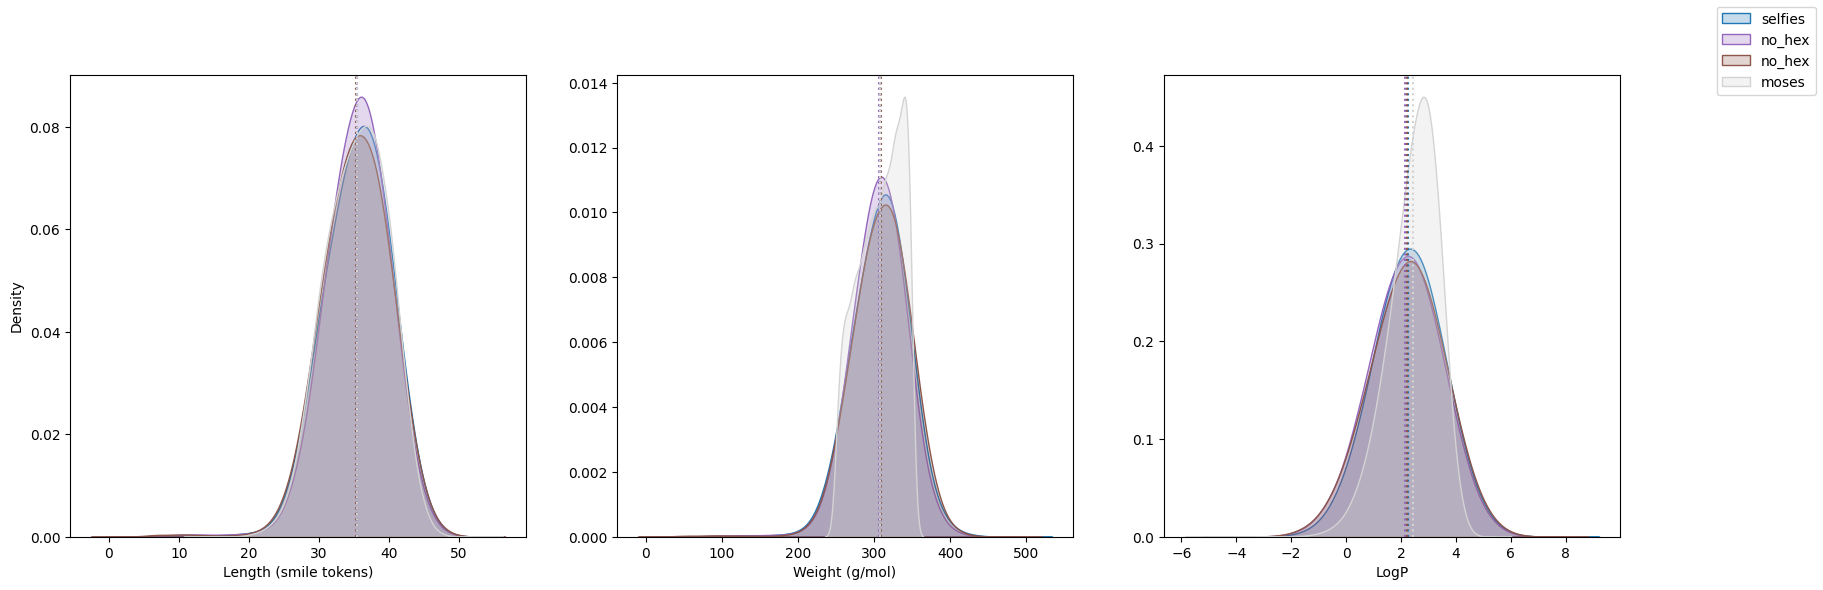

In [40]:
#Supplemental Plots (Length , Weight, LogP show little difference)

f, ax = plt.subplots(1, 3, figsize=(20, 6))

#Length
sf_len_mean = np.mean(sf_qual["len"])
no_hex_len_mean = np.mean(no_hex_qual["len"])
no_overload_len_mean = np.mean(no_overload_qual["len"])

sns.kdeplot(data=sf_qual["len"], ax=ax[0], color=palette[0], fill=True, label='selfies',  bw_adjust=3)
sns.kdeplot(data=no_hex_qual["len"], ax=ax[0], color=palette[4], fill=True, label='no_hex',  bw_adjust=3)
sns.kdeplot(data=no_overload_qual["len"], ax=ax[0], color=palette[5], fill=True, label='no_hex',  bw_adjust=3)
sns.kdeplot(data=ms_qual["len"], ax=ax[0], color=palette[3], fill=True, label='moses', bw_adjust=3)




ax[0].set_ylabel("Density")
ax[0].set_xlabel("Length (smile tokens)")

ax[0].axvline(sf_len_mean, ls=':', color=palette[0])
ax[0].axvline(no_hex_len_mean, ls=':', color=palette[4])
ax[0].axvline(no_overload_len_mean, ls=':', color=palette[5])
ax[0].axvline(ms_len_mean, ls=':', color=palette[3])


#Molecular Weight
sf_weight_mean = np.mean(sf_qual["weight"])
no_hex_weight_mean = np.mean(no_hex_qual["weight"])
no_overload_weight_mean = np.mean(no_overload_qual["weight"])

sns.kdeplot(data=sf_qual["weight"], ax=ax[1], color=palette[0], fill=True, bw_adjust=3)
sns.kdeplot(data=no_hex_qual["weight"], ax=ax[1], color=palette[4], fill=True, bw_adjust=3)
sns.kdeplot(data=no_overload_qual["weight"], ax=ax[1], color=palette[5], fill=True, bw_adjust=3)
sns.kdeplot(data=ms_qual["weight"], ax=ax[1], color=palette[3], fill=True, bw_adjust=3)


ax[1].set_ylabel(" ")
ax[1].set_xlabel("Weight (g/mol)")

ax[1].axvline(sf_weight_mean, ls=':', color=palette[0])
ax[1].axvline(no_hex_weight_mean, ls=':', color=palette[4])
ax[1].axvline(no_overload_weight_mean, ls=':', color=palette[5])
ax[1].axvline(ms_weight_mean, ls=':', color=palette[3])

#LogP
sf_logp_mean = np.mean(sf_qual["logp"])
no_hex_logp_mean = np.mean(no_hex_qual["logp"])
no_overload_logp_mean = np.mean(no_overload_qual["logp"])

sns.kdeplot(data=sf_qual["logp"], ax=ax[2], color=palette[0], fill=True, bw_adjust=3)
sns.kdeplot(data=no_hex_qual["logp"], ax=ax[2], color=palette[4], fill=True, bw_adjust=3)
sns.kdeplot(data=no_overload_qual["logp"], ax=ax[2], color=palette[5], fill=True, bw_adjust=3)
sns.kdeplot(data=ms_qual["logp"], ax=ax[2], color=palette[3], fill=True, bw_adjust=3)


ax[2].set_ylabel(" ")
ax[2].set_xlabel("LogP")

ax[2].axvline(sf_logp_mean, ls=':', color=palette[0])
ax[2].axvline(no_hex_logp_mean, ls=':', color=palette[4])
ax[2].axvline(no_overload_logp_mean, ls=':', color=palette[5])
ax[2].axvline(ms_logp_mean, ls=':', color=palette[3])

f.legend(loc="upper right")

plt.show()

plt.tight_layout()
f.savefig("Paper Figures/Length-Weight-LogP_sf_hex_over_ms.pdf")


In [28]:
from scipy.stats import wasserstein_distance

#QED
print("QED Wasserstein distance to Moses distribution")
w = wasserstein_distance(ms_qual["QED"], ms_qual_subset["QED"])
print("Moses subset: " + str(w))
w = wasserstein_distance(ms_qual["QED"], sf_qual_subset["QED"])
print("Selfies: " + str(w))
w = wasserstein_distance(ms_qual["QED"], sm_qual_subset["QED"])
print("Smiles: " + str(w))
w = wasserstein_distance(ms_qual["QED"], sf_un_qual_subset["QED"])
print("Unstable: " + str(w))
w = wasserstein_distance(ms_qual["QED"], no_hex_qual_subset["QED"])
print("No hex: " + str(w))
w = wasserstein_distance(ms_qual["QED"], no_overload_qual_subset["QED"])
print("No overload: " + str(w))

#SA
print("\nSA Wasserstein distance to Moses distribution")
w = wasserstein_distance(ms_qual["SA"], ms_qual_subset["SA"])
print("Moses subset: " + str(w))
w = wasserstein_distance(ms_qual["SA"], sf_qual["SA"])
print("Selfies: " + str(w))
w = wasserstein_distance(ms_qual["SA"], sm_qual["SA"])
print("Smiles: " + str(w))
w = wasserstein_distance(ms_qual["SA"], sf_un_qual["SA"])
print("Unstable: " + str(w))
w = wasserstein_distance(ms_qual["SA"], no_hex_qual_subset["SA"])
print("No hex: " + str(w))
w = wasserstein_distance(ms_qual["SA"], no_overload_qual_subset["SA"])
print("No overload: " + str(w))

#length
print("\nLen Wasserstein distance to Moses distribution")
w = wasserstein_distance(ms_qual["len"], ms_qual_subset["len"])
print("Moses subset: " + str(w))
w = wasserstein_distance(ms_qual["len"], sf_qual["len"])
print("Selfies: " + str(w))
w = wasserstein_distance(ms_qual["len"], sm_qual["len"])
print("Smiles: " + str(w))
w = wasserstein_distance(ms_qual["len"], sf_un_qual["len"])
print("Unstable: " + str(w))
w = wasserstein_distance(ms_qual["len"], no_hex_qual_subset["len"])
print("No hex: " + str(w))
w = wasserstein_distance(ms_qual["len"], no_overload_qual_subset["len"])
print("No overload: " + str(w))

#weight
print("\nWeight Wasserstein distance to Moses distribution")
w = wasserstein_distance(ms_qual["weight"], ms_qual_subset["weight"])
print("Moses subset: " + str(w))
w = wasserstein_distance(ms_qual["weight"], sf_qual["weight"])
print("Selfies: " + str(w))
w = wasserstein_distance(ms_qual["weight"], sm_qual["weight"])
print("Smiles: " + str(w))
w = wasserstein_distance(ms_qual["weight"], sf_un_qual["weight"])
print("Unstable: " + str(w))
w = wasserstein_distance(ms_qual["weight"], no_hex_qual_subset["weight"])
print("No hex: " + str(w))
w = wasserstein_distance(ms_qual["weight"], no_overload_qual_subset["weight"])
print("No overload: " + str(w))

#LogP
print("\nLogP Wasserstein distance to Moses distribution")
w = wasserstein_distance(ms_qual["logp"], ms_qual_subset["logp"])
print("Moses subset: " + str(w))
w = wasserstein_distance(ms_qual["logp"], sf_qual["logp"])
print("Selfies: " + str(w))
w = wasserstein_distance(ms_qual["logp"], sm_qual["logp"])
print("Smiles: " + str(w))
w = wasserstein_distance(ms_qual["logp"], sf_un_qual["logp"])
print("Unstable: " + str(w))
w = wasserstein_distance(ms_qual["logp"], no_hex_qual_subset["logp"])
print("No hex: " + str(w))
w = wasserstein_distance(ms_qual["logp"], no_overload_qual_subset["logp"])
print("No overload: " + str(w))

QED Wasserstein distance to Moses distribution
Moses subset: 0.00034207882997062787
Selfies: 0.12627275831261972
Smiles: 0.030732720715646675
Unstable: 0.1789744461605582
No hex: 0.13415530327529
No overload: 0.13672865005854262

SA Wasserstein distance to Moses distribution
Moses subset: 0.002077706439002382
Selfies: 1.3243358936002512
Smiles: 0.5154440901276843
Unstable: 1.4910663817929375
No hex: 1.2421720127816038
No overload: 1.1971852875233644

Len Wasserstein distance to Moses distribution
Moses subset: 0.015857116705570766
Selfies: 0.22068404631941818
Smiles: 0.22527588713483637
Unstable: 0.37625661646519515
No hex: 0.26280546049223097
No overload: 0.24720159073569595

Weight Wasserstein distance to Moses distribution
Moses subset: 0.0837162535532667
Selfies: 5.764766279006899
Smiles: 6.430249479586611
Unstable: 6.801369518617491
No hex: 5.8118701897462755
No overload: 6.441707184479492

LogP Wasserstein distance to Moses distribution
Moses subset: 0.00362297970886163
Selfies: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


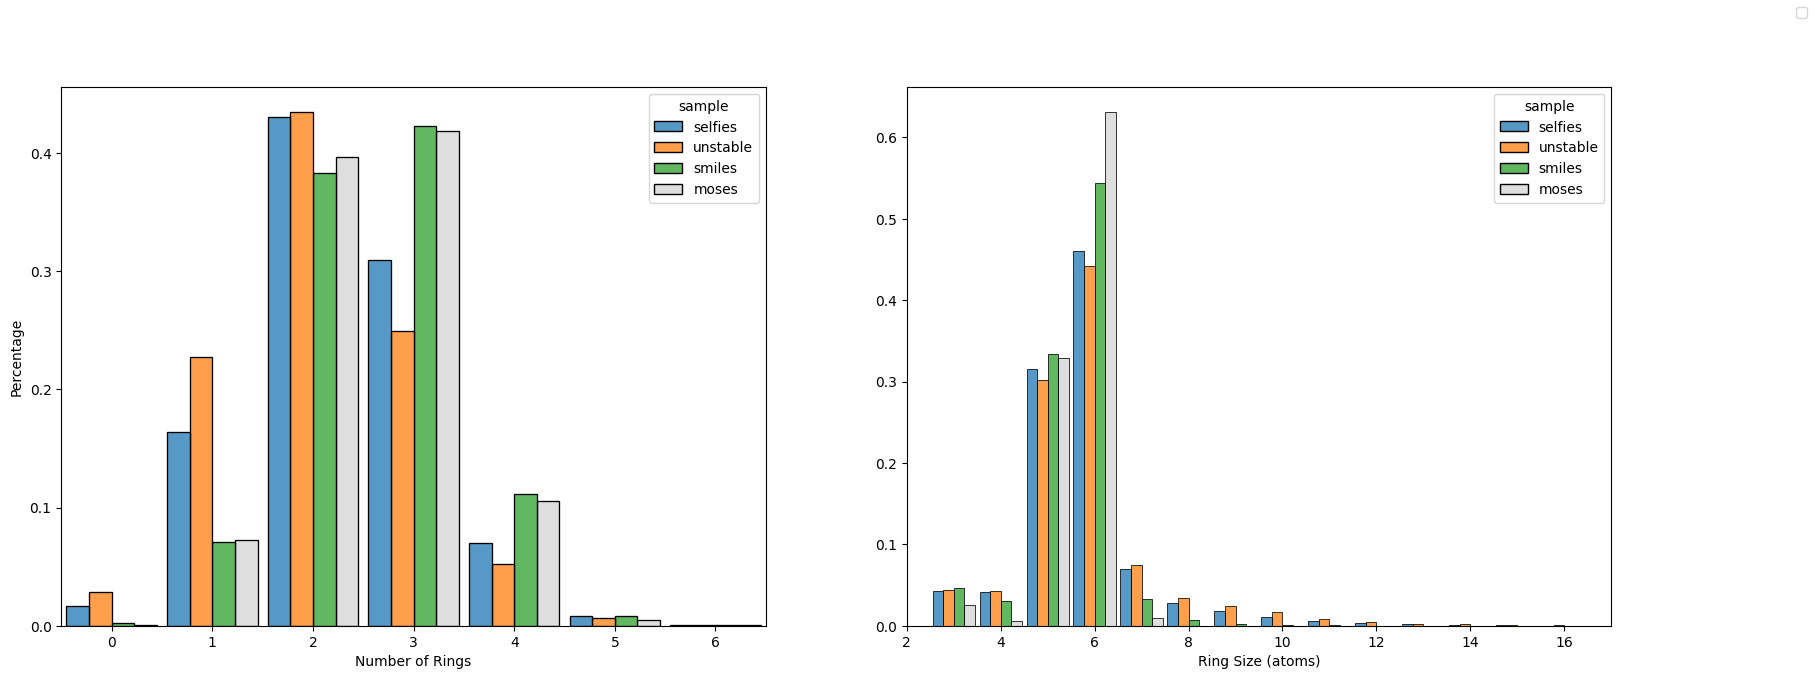

In [36]:
f, ax = plt.subplots(1, 2, figsize=(20, 7))

sm_ring_mean = np.mean(sm_qual["num rings"])
sf_ring_mean = np.mean(sf_qual["num rings"])
sf_un_ring_mean = np.mean(sf_un_qual["num rings"])
ms_un_mean = np.mean(ms_qual["num rings"])


sm_qual["sample"] = "smiles"
sf_qual["sample"] = "selfies"
sf_un_qual["sample"] = "unstable"
ms_qual["sample"] = "moses"

data = pd.concat((sf_qual[["sample", "num rings"]], 
                    sf_un_qual[["sample", "num rings"]],
                    sm_qual[["sample", "num rings"]],
                    ms_qual[["sample", "num rings"]]), axis=0)

sns.histplot(data, x="num rings", ax=ax[0], palette=palette[0:4], hue="sample", stat="density", multiple="dodge", fill=True, discrete=True, common_norm=False, shrink=0.9)


ax[0].set_ylabel("Percentage", fontsize=10)
ax[0].set_xlabel("Number of Rings", fontsize=10)
ax[0].set_xlim(-0.5, 6.5)


sm_sizes = [i for l in sm_qual["ring sizes"] for i in eval(l)]
sf_sizes = [i for l in sf_qual["ring sizes"] for i in eval(l)]
sf_un_sizes = [i for l in sf_un_qual["ring sizes"] for i in eval(l)]
ms_sizes = [i for l in ms_qual["ring sizes"] for i in eval(l)]


sm_sizes_subset = [i for l in sm_qual_subset["ring sizes"] for i in eval(l)]
sf_sizes_subset = [i for l in sf_qual_subset["ring sizes"] for i in eval(l)]
sf_un_sizes_subset = [i for l in sf_un_qual_subset["ring sizes"] for i in eval(l)]
ms_sizes_subset = [i for l in ms_qual_subset["ring sizes"] for i in eval(l)]


sm_data = pd.DataFrame(sm_sizes, columns=["ring size"])
sm_data["sample"] = "smiles"
sf_data = pd.DataFrame(sf_sizes, columns=["ring size"])
sf_data["sample"] = "selfies"
sf_un_data = pd.DataFrame(sf_un_sizes, columns=["ring size"])
sf_un_data["sample"] = "unstable"
ms_data = pd.DataFrame(ms_sizes, columns=["ring size"])
ms_data["sample"] = "moses"

data = pd.concat((sf_data, sf_un_data, sm_data, ms_data), axis=0)


sns.histplot(data, x="ring size", ax=ax[1], palette=palette[0:4], hue="sample", stat="density", multiple="dodge", fill=True, discrete=True, common_norm=False, shrink=0.9)


ax[1].set_ylabel(" ")
ax[1].set_xlabel("Ring Size (atoms)", fontsize=10)
ax[1].set_xlim(2, 17)


f.legend(loc="upper right")

plt.show()

f.savefig("Paper Figures/Ring-Num-Size_sf_un_sm_ms.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


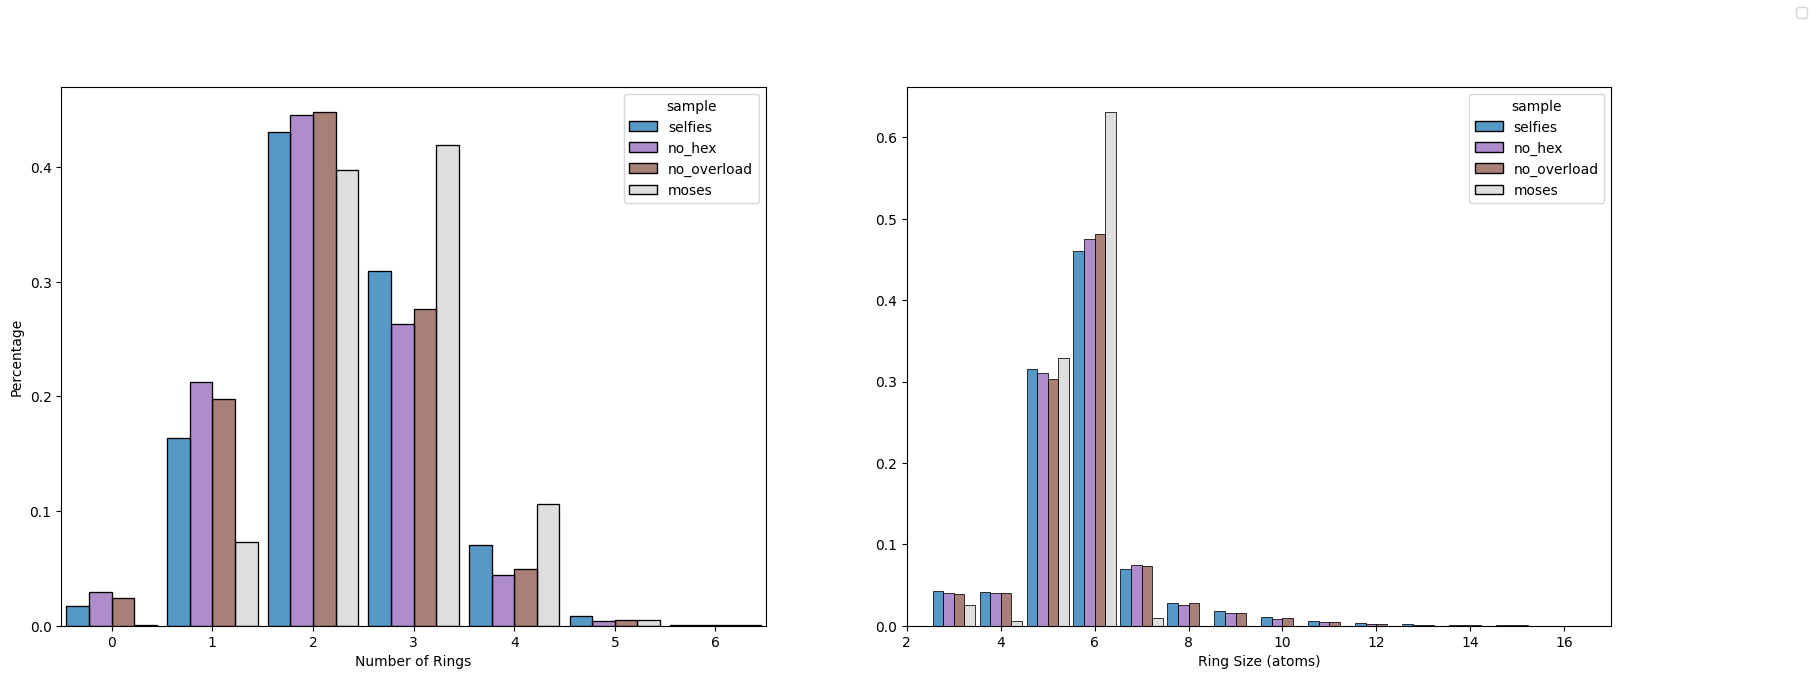

In [39]:
f, ax = plt.subplots(1, 2, figsize=(20, 7))

sf_ring_mean = np.mean(sf_qual["num rings"])
no_hex_ring_mean = np.mean(no_hex_qual["num rings"])
no_overload_ring_mean = np.mean(no_overload_qual["num rings"])


no_hex_qual["sample"] = "no_hex"
no_overload_qual["sample"] = "no_overload"

data = pd.concat((sf_qual[["sample", "num rings"]], 
                    no_hex_qual[["sample", "num rings"]],
                    no_overload_qual[["sample", "num rings"]],
                    ms_qual[["sample", "num rings"]]), axis=0)


sns.histplot(data, x="num rings", ax=ax[0], palette=[palette[i] for i in [0,4,5,3]], hue="sample", stat="density", multiple="dodge", fill=True, discrete=True, common_norm=False, shrink=0.9)


ax[0].set_ylabel("Percentage", fontsize=10)
ax[0].set_xlabel("Number of Rings", fontsize=10)
ax[0].set_xlim(-0.5, 6.5)


no_hex_sizes = [i for l in no_hex_qual["ring sizes"] for i in eval(l)]
no_overload_sizes = [i for l in no_overload_qual["ring sizes"] for i in eval(l)]


no_hex_sizes_subset = [i for l in no_hex_qual_subset["ring sizes"] for i in eval(l)]
no_overload_sizes_subset = [i for l in no_overload_qual_subset["ring sizes"] for i in eval(l)]


no_hex_data = pd.DataFrame(no_hex_sizes, columns=["ring size"])
no_hex_data["sample"] = "no_hex"
no_overload_data = pd.DataFrame(no_overload_sizes, columns=["ring size"])
no_overload_data["sample"] = "no_overload"


data = pd.concat((sf_data, no_hex_data, no_overload_data, ms_data), axis=0)


sns.histplot(data, x="ring size", ax=ax[1], palette=[palette[i] for i in [0,4,5,3]], hue="sample", stat="density", multiple="dodge", fill=True, discrete=True, common_norm=False, shrink=0.9)


ax[1].set_ylabel(" ")
ax[1].set_xlabel("Ring Size (atoms)", fontsize=10)
ax[1].set_xlim(2, 17)


f.legend(loc="upper right")

plt.show()

f.savefig("Paper Figures/Ring-Num-Size_sf_hex_over_ms.pdf")

In [38]:
from scipy.stats import wasserstein_distance

#Num Rings
print("Num Rings Wasserstein distance to Moses distribution")
w = wasserstein_distance(ms_qual["num rings"], ms_qual_subset["num rings"])
print("Moses subset: " + str(w))
w = wasserstein_distance(ms_qual["num rings"], sf_qual_subset["num rings"])
print("Selfies: " + str(w))
w = wasserstein_distance(ms_qual["num rings"], sm_qual_subset["num rings"])
print("Smiles: " + str(w))
w = wasserstein_distance(ms_qual["num rings"], sf_un_qual_subset["num rings"])
print("Unstable: " + str(w))
w = wasserstein_distance(ms_qual["num rings"], no_hex_qual_subset["num rings"])
print("No_hex: " + str(w))
w = wasserstein_distance(ms_qual["num rings"], no_overload_qual_subset["num rings"])
print("No_overload: " + str(w))

#Ring Size
print("\nRing Size Wasserstein distance to Moses distribution")
w = wasserstein_distance(ms_sizes, ms_sizes_subset)
print("Moses subset: " + str(w))
w = wasserstein_distance(ms_sizes, sf_sizes_subset)
print("Selfies: " + str(w))
w = wasserstein_distance(ms_sizes, sm_sizes_subset)
print("Smiles: " + str(w))
w = wasserstein_distance(ms_sizes, sf_un_sizes_subset)
print("Unstable: " + str(w))
w = wasserstein_distance(ms_sizes, no_hex_sizes_subset)
print("No_hex: " + str(w))
w = wasserstein_distance(ms_sizes, no_overload_sizes_subset)
print("No_overload: " + str(w))

Num Rings Wasserstein distance to Moses distribution
Moses subset: 0.0029898352141749427
Selfies: 0.3068485529604717
Smiles: 0.028235612360483147
Unstable: 0.48866855296047174
No_hex: 0.4770629750678851
No_overload: 0.43085988969894523

Ring Size Wasserstein distance to Moses distribution
Moses subset: 0.0009424477405050452
Selfies: 0.4073076230063351
Smiles: 0.1723469456386035
Unstable: 0.5015106999782795
No_hex: 0.34716389283089577
No_overload: 0.349525384227234


In [41]:
#Validity
print("Sampled smiles invalid rate: " + str(len(sm_qual["QED"])/300000))
print("Canon smile from sampled selfie invalid rate: " +  str(len(sf_qual["QED"])/300000))
print("Canon smile from sampled no hex selfie invalid rate: " +  str(len(no_hex_qual["QED"])/300000))
print("Canon smile from sampled no overload selfie invalid rate: " +  str(len(no_overload_qual["QED"])/300000))

#QED
print("\nFraction of smiles above 0.5 QED: " + str(len(sm_qual[sm_qual["QED"] > 0.5])/len(sm_qual["QED"])))
print("Fraction of selfies above 0.5 QED: " + str(len(sf_qual[sf_qual["QED"] > 0.5])/len(sf_qual["QED"])))
print("Fraction of unstable selfies above 0.5 QED: " + str(len(sf_trunc_qual[sf_trunc_qual["QED"] > 0.5])/len(sf_trunc_qual["QED"])))
print("Fraction of moses mols above 0.5 QED: " + str(len(ms_qual[ms_qual["QED"] > 0.5])/len(ms_qual["QED"])))
print("Fraction of no hex selfies above 0.5 QED: " + str(len(no_hex_qual[no_hex_qual["QED"] > 0.5])/len(no_hex_qual["QED"])))
print("Fraction of no overload selfies above 0.5 QED: " + str(len(no_overload_qual[no_overload_qual["QED"] > 0.5])/len(no_overload_qual["QED"])))

#SA
print("\nFraction of smiles under 4.4 SA: " + str(len(sm_qual[sm_qual["SA"] < 4.4])/len(sm_qual["SA"])))
print("Fraction of selfies under 4.4 SA: " + str(len(sf_qual[sf_qual["SA"] < 4.4])/len(sf_qual["SA"])))
print("Fraction of unstable selfies under 4.4 SA: " + str(len(sf_trunc_qual[sf_trunc_qual["SA"] < 4.4])/len(sf_trunc_qual["SA"])))
print("Fraction of moses mols under 4.4 SA: " + str(len(ms_qual[ms_qual["SA"] < 4.4])/len(ms_qual["SA"])))
print("Fraction of no hex selfies under 4.4 SA: " + str(len(no_hex_qual[no_hex_qual["SA"] < 4.4])/len(no_hex_qual["SA"])))
print("Fraction of no overload selfies under 4.4 SA: " + str(len(no_overload_qual[no_overload_qual["SA"] < 4.4])/len(no_overload_qual["SA"])))


#LogP
print("\nFraction of smiles wi LogP range " + str(len(sm_qual[(sm_qual["logp"] > -.04) & (sm_qual["logp"] < 5.6)])/len(sm_qual["logp"])))
print("Fraction of selfies wi LogP range " + str(len(sf_qual[(sf_qual["logp"] > -.04) & (sf_qual["logp"] < 5.6)])/len(sf_qual["logp"])))
print("Fraction of unstable selfies wi LogP range " + str(len(sf_un_qual[(sf_un_qual["logp"] > -.04) & (sf_un_qual["logp"] < 5.6)])/len(sf_un_qual["logp"])))
print("Fraction of moses wi LogP range " + str(len(ms_qual[(ms_qual["logp"] > -.04) & (ms_qual["logp"] < 5.6)])/len(ms_qual["logp"])))
print("Fraction of no hex selfies wi LogP range " + str(len(no_hex_qual[(no_hex_qual["logp"] > -.04) & (no_hex_qual["logp"] < 5.6)])/len(no_hex_qual["logp"])))
print("Fraction of no overload selfies wi LogP range " + str(len(no_overload_qual[(no_overload_qual["logp"] > -.04) & (no_overload_qual["logp"] < 5.6)])/len(no_overload_qual["logp"])))


#Thresholding for druglike smiles
sm_qual_cut = sm_qual[sm_qual["QED"] > 0.5]
sm_qual_cut = sm_qual_cut[sm_qual_cut["SA"] < 4.4]
sm_qual_cut = sm_qual_cut[sm_qual_cut["logp"] > -0.4]
sm_qual_cut = sm_qual_cut[sm_qual_cut["logp"] < 5.6]
print("\nFraction of retained sampled smiles: " + str(len(sm_qual_cut)/300000))

#Thresholding for druglike selfies
sf_qual_cut = sf_qual[sf_qual["QED"] > 0.5]
sf_qual_cut = sf_qual_cut[sf_qual_cut["SA"] < 4.4]
sf_qual_cut = sf_qual_cut[sf_qual_cut["logp"] > -0.4]
sf_qual_cut = sf_qual_cut[sf_qual_cut["logp"] < 5.6]
print("Fraction of retained sampled selfies: " + str(len(sf_qual_cut)/300000))

#Thresholding for druglike no hex selfies
no_hex_qual_cut = no_hex_qual[no_hex_qual["QED"] > 0.5]
no_hex_qual_cut = no_hex_qual_cut[no_hex_qual_cut["SA"] < 4.4]
no_hex_qual_cut = no_hex_qual_cut[no_hex_qual_cut["logp"] > -0.4]
no_hex_qual_cut = no_hex_qual_cut[no_hex_qual_cut["logp"] < 5.6]
print("Fraction of retained sampled no hex selfies: " + str(len(no_hex_qual_cut)/300000))

#Thresholding for druglike no overload selfies
no_overload_qual_cut = no_overload_qual[no_overload_qual["QED"] > 0.5]
no_overload_qual_cut = no_overload_qual_cut[no_overload_qual_cut["SA"] < 4.4]
no_overload_qual_cut = no_overload_qual_cut[no_overload_qual_cut["logp"] > -0.4]
no_overload_qual_cut = no_overload_qual_cut[no_overload_qual_cut["logp"] < 5.6]
print("Fraction of retained sampled no overload selfies: " + str(len(no_overload_qual_cut)/300000))

#Thresholding for moses mols
ms_qual_cut = ms_qual[ms_qual["QED"] > 0.5]
ms_qual_cut = ms_qual_cut[ms_qual_cut["SA"] < 4.4]
ms_qual_cut = ms_qual_cut[ms_qual_cut["logp"] > -0.4]
ms_qual_cut = ms_qual_cut[ms_qual_cut["logp"] < 5.6]
print("Fraction of retained moses mols: " + str(len(ms_qual_cut)/len(ms_qual["QED"])))

#Thresholding for druglike unstable selfies
sf_un_qual_cut = sf_un_qual[sf_un_qual["QED"] > 0.5]
sf_un_qual_cut = sf_un_qual_cut[sf_un_qual_cut["SA"] < 4.4]
sf_un_qual_cut = sf_un_qual_cut[sf_un_qual_cut["logp"] > -0.4]
sf_un_qual_cut = sf_un_qual_cut[sf_un_qual_cut["logp"] < 5.6]
print("Fraction of retained unstable sampled selfies: " + str(len(sf_un_qual_cut)/len(sf_un_qual["QED"])))

#Thresholding for druglike stable selfies
num_stable_selfies = len(sf_qual["QED"]) - len(sf_un_qual["QED"])
num_stable_selfies_uncut = len(sf_qual_cut["QED"]) - len(sf_un_qual_cut["QED"])
print("Fraction of retained sampled stable selfies: " + str(num_stable_selfies_uncut/num_stable_selfies))


Sampled smiles invalid rate: 0.83005
Canon smile from sampled selfie invalid rate: 0.9999533333333334
Canon smile from sampled no hex selfie invalid rate: 0.99995
Canon smile from sampled no overload selfie invalid rate: 0.99995

Fraction of smiles above 0.5 QED: 0.9759412083609421
Fraction of selfies above 0.5 QED: 0.8186915389384838
Fraction of unstable selfies above 0.5 QED: 0.7145342935859635
Fraction of moses mols above 0.5 QED: 0.9926123093679855
Fraction of no hex selfies above 0.5 QED: 0.8060469690151174
Fraction of no overload selfies above 0.5 QED: 0.8023634515059086

Fraction of smiles under 4.4 SA: 0.966720880268257
Fraction of selfies under 4.4 SA: 0.766095751135053
Fraction of unstable selfies under 4.4 SA: 0.7129754942239838
Fraction of moses mols under 4.4 SA: 0.9983239338584923
Fraction of no hex selfies under 4.4 SA: 0.8021834425054586
Fraction of no overload selfies under 4.4 SA: 0.8173008650432522

Fraction of smiles wi LogP range 0.9597654759753429
Fraction of self